**Data Science & Business Analytics Tasks-6(Using Decision Tree Algorithm)**

**Objective:- Create the Decision Tree classifier and visualize it graphically.**

By- SHIVAM KUMAR GUPTA

## **Importing the libraries**

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import  tree
from sklearn.metrics import confusion_matrix,accuracy_score,f1_score,mean_squared_error

### **Importing the dataset**

In [3]:
#Uploading the Iris dataset by google colab
from google.colab import files
uploaded=files.upload()

Saving Iris.csv to Iris.csv


In [4]:
iris_data=pd.read_csv('Iris.csv')

In [5]:
#the first 5 rows of the given dataset
print("iris_dataset:-",iris_data.head(5))

iris_dataset:-    Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa


In [6]:
#columns name
iris_data.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [7]:
# Unique Value of the Species column
iris_data['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [8]:
#Information about the Iris-Dataset
iris_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [9]:
#Describe of descriptive statistics about the dataset
iris_data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [10]:
iris_data['Species'].value_counts()

Iris-versicolor    50
Iris-virginica     50
Iris-setosa        50
Name: Species, dtype: int64

([<matplotlib.patches.Wedge at 0x7ff862293190>,
 [Text(0.5999999675667398, 1.0392305032666773, 'Iris-setosa'),
  Text(-1.199999999999995, -1.1235210826980003e-07, 'Iris-versicolor'),
  Text(0.6000001621662929, -1.0392303909145566, 'Iris-virginica')],
 [Text(0.3499999810805982, 0.6062177935722284, '33.3%'),
  Text(-0.699999999999997, -6.553872982405e-08, '33.3%'),
  Text(0.3500000945970042, -0.6062177280334914, '33.3%')])

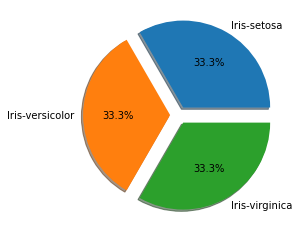

In [11]:
r=pd.get_dummies(iris_data['Species'])
r1=(sum(r["Iris-setosa"]),sum(r["Iris-versicolor"]),sum(r["Iris-virginica"]))
plt.pie(r1,labels=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'],shadow=True,explode=(.1,.1,.1),autopct='%1.1f%%')

# **Transform the categorical data into numerical data**

In [12]:
ch_cat=preprocessing.LabelEncoder()
ch_cat.fit(iris_data['Species'])
list(ch_cat.classes_)
iris_data['Species']=ch_cat.transform(iris_data['Species'])

In [13]:
X=iris_data.iloc[:,1:5].values
y=iris_data.iloc[:,-1].values

In [14]:
print(X)
print(y)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.1 1.5 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

# **Splitting the dataset into the Training set and Test set**

In [15]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

# **Training the Decision Tree Classification model on the Training set** 

In [16]:
Classifier=DecisionTreeClassifier(criterion='entropy',random_state=0)
tree_clf=Classifier.fit(X_train,y_train)
y_pred=tree_clf.predict(X_test)

# **Making the Confusion Matrix and Accuracy Score**

In [17]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
print("Accuracy_score:",accuracy_score(y_test, y_pred))

[[13  0  0]
 [ 0 15  1]
 [ 0  0  9]]
Accuracy_score: 0.9736842105263158


# **Visualising the Decision tree results**

[Text(334.8, 489.24, 'PetalWidthCm <= 0.8\nentropy = 1.581\nsamples = 112\nvalue = [37, 34, 41]\nclass = setosa'),
 Text(251.10000000000002, 380.52000000000004, 'entropy = 0.0\nsamples = 37\nvalue = [37, 0, 0]\nclass = virginica'),
 Text(418.5, 380.52000000000004, 'PetalLengthCm <= 4.95\nentropy = 0.994\nsamples = 75\nvalue = [0, 34, 41]\nclass = setosa'),
 Text(167.4, 271.8, 'PetalWidthCm <= 1.65\nentropy = 0.414\nsamples = 36\nvalue = [0, 33, 3]\nclass = versicolor'),
 Text(83.7, 163.08000000000004, 'entropy = 0.0\nsamples = 32\nvalue = [0, 32, 0]\nclass = versicolor'),
 Text(251.10000000000002, 163.08000000000004, 'SepalWidthCm <= 3.1\nentropy = 0.811\nsamples = 4\nvalue = [0, 1, 3]\nclass = setosa'),
 Text(167.4, 54.360000000000014, 'entropy = 0.0\nsamples = 3\nvalue = [0, 0, 3]\nclass = setosa'),
 Text(334.8, 54.360000000000014, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1, 0]\nclass = versicolor'),
 Text(669.6, 271.8, 'PetalWidthCm <= 1.75\nentropy = 0.172\nsamples = 39\nvalue = [0

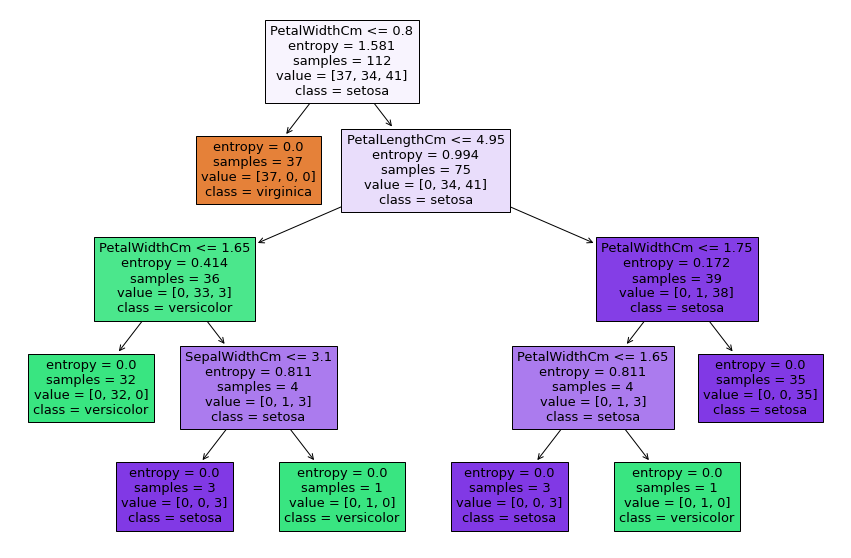

In [18]:
feat_n=['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
class_n=['virginica','versicolor','setosa']
plt.figure(figsize=(15,10))
tree.plot_tree(tree_clf,feature_names=feat_n,class_names=class_n,filled=True)